# **A. Import Library**

In [1]:
# ===== Basic Data Handling Libraries =====
import pandas as pd
import numpy as np

# ===== Visualization Libraries =====
import matplotlib.pyplot as plt
import seaborn as sns

# Set default style for seaborn
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

# ===== Machine Learning Libraries =====
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    classification_report,
    confusion_matrix,
    roc_curve
)
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC

# ===== Handling Class Imbalance =====
from imblearn.over_sampling import SMOTE

# ===== Suppress Warnings =====
import warnings
warnings.filterwarnings('ignore')



# **B. Data Loading & Overview**

Data diabetes dimuat dari file CSV. Dataset ini berisi berbagai fitur yang akan digunakan untuk memprediksi apakah seseorang mengidap diabetes atau tidak, dan kita melihat 5 baris pertama untuk memahami struktur datanya:

In [2]:
df = pd.read_csv('diabetes_prediction_dataset.csv')

In [3]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


## **1. Informasi Dataset**

Untuk memahami struktur dataset secara keseluruhan, kita melihat informasi umum seperti tipe data dan jumlah nilai tidak null:

In [4]:
# 1. Info umum
print("\n=== Info Dataset ===")
print(df.info())





=== Info Dataset ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB
None


## **2.  Statistik Deskriptif**


Statistik deskriptif memberikan ringkasan numerik tentang data seperti rata-rata, standar deviasi, nilai minimum dan maksimum:

In [5]:
# 2. Statistik deskriptif
print("\n=== Statistik Deskriptif ===")
print(df.describe())



=== Statistik Deskriptif ===
                 age  hypertension  heart_disease            bmi  \
count  100000.000000  100000.00000  100000.000000  100000.000000   
mean       41.885856       0.07485       0.039420      27.320767   
std        22.516840       0.26315       0.194593       6.636783   
min         0.080000       0.00000       0.000000      10.010000   
25%        24.000000       0.00000       0.000000      23.630000   
50%        43.000000       0.00000       0.000000      27.320000   
75%        60.000000       0.00000       0.000000      29.580000   
max        80.000000       1.00000       1.000000      95.690000   

         HbA1c_level  blood_glucose_level       diabetes  
count  100000.000000        100000.000000  100000.000000  
mean        5.527507           138.058060       0.085000  
std         1.070672            40.708136       0.278883  
min         3.500000            80.000000       0.000000  
25%         4.800000           100.000000       0.000000  
50%

## **3. Cek Missing Values**

Mengecek apakah ada nilai kosong (missing) dalam dataset.

In [6]:
# 3. Cek missing values
print("\n=== Missing Values ===")
print(df.isnull().sum())




=== Missing Values ===
gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64


## **4. Cek duplicate rows**

mengecek apakah ada data yang duplicate

In [7]:
print("\n=== Duplicate Rows ===")
print(f"Total duplicate rows: {df.duplicated().sum()}")


=== Duplicate Rows ===
Total duplicate rows: 3854


# **C. EDA (Exploratory Data Analysis)**

Pada tahap ini, kita akan melakukan analisis mendalam untuk memahami data, mengidentifikasi pola, dan menentukan fitur-fitur yang paling relevan untuk prediksi diabetes."
  

## **1. Distribusi Kelas Target**

Melihat distribusi kelas target (diabetes) untuk mengetahui apakah data seimbang atau tidak:

=== Distribusi Target (Diabetes) ===
diabetes
0    91500
1     8500
Name: count, dtype: int64

Percentage:
diabetes
0    91.5
1     8.5
Name: count, dtype: float64


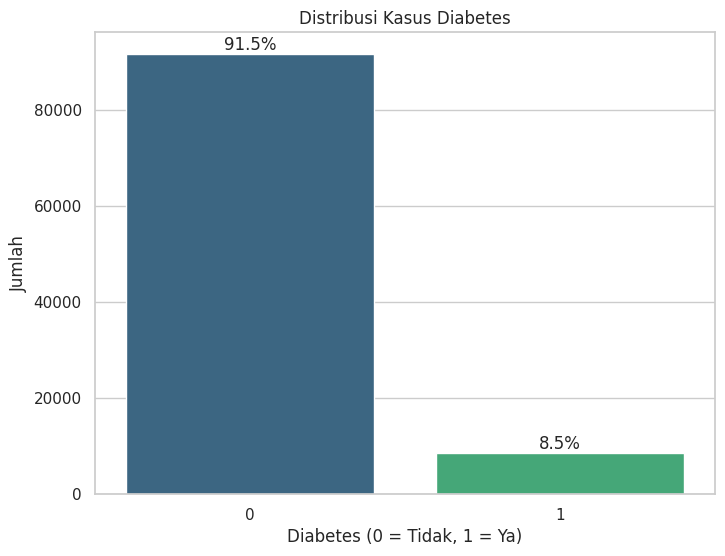

In [8]:
print("=== Distribusi Target (Diabetes) ===")
target_counts = df['diabetes'].value_counts()
print(target_counts)
print(f"\nPercentage:\n{target_counts / len(df) * 100}")

# Visualisasi distribusi diabetes
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='diabetes', data=df, palette='viridis')

# Tambahkan label persen
total = len(df)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%'
    ax.annotate(percentage, (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom')

plt.title("Distribusi Kasus Diabetes")
plt.xlabel("Diabetes (0 = Tidak, 1 = Ya)")
plt.ylabel("Jumlah")
plt.show()

Terdapat ketidakseimbangan pada kelas target dengan mayoritas sampel merupakan kasus non-diabetes.

## **2. Distribusi Fitur Kategorikal**

Memvisualisasikan distribusi untuk fitur-fitur kategorikal seperti gender dan smoking history.

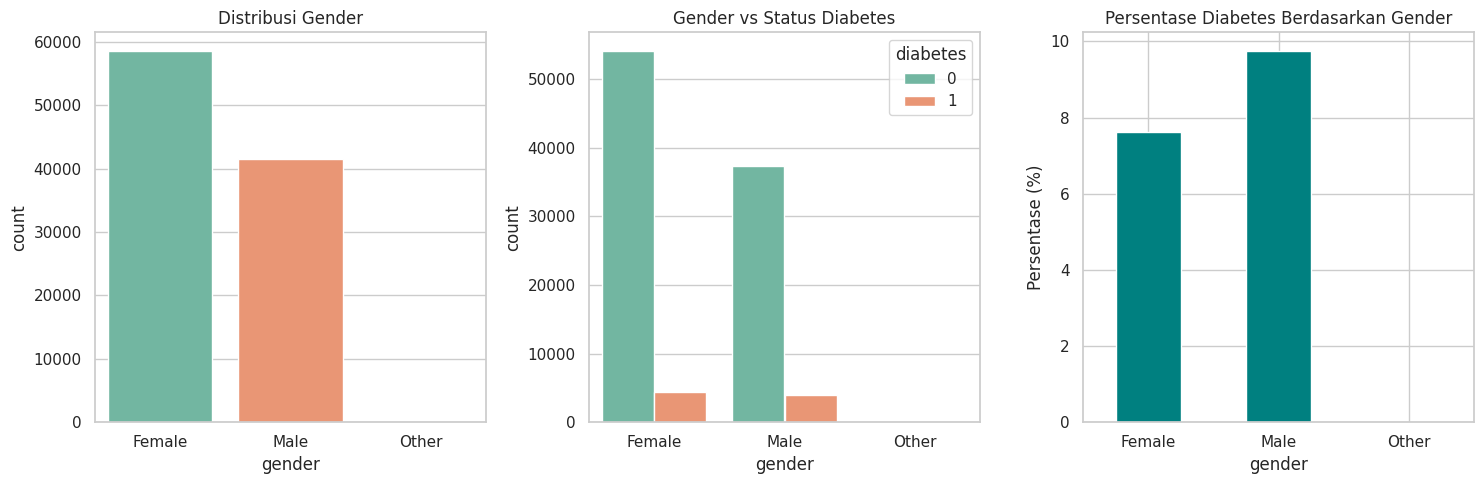

In [9]:

plt.figure(figsize=(15, 5))

# Gender
plt.subplot(1, 3, 1)
sns.countplot(data=df, x='gender', palette='Set2')
plt.title("Distribusi Gender")

plt.subplot(1, 3, 2)
sns.countplot(data=df, x='gender', hue='diabetes', palette='Set2')
plt.title("Gender vs Status Diabetes")

plt.subplot(1, 3, 3)
(df.groupby('gender')['diabetes'].mean() * 100).plot(kind='bar', color='teal')
plt.title("Persentase Diabetes Berdasarkan Gender")
plt.ylabel("Persentase (%)")
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()



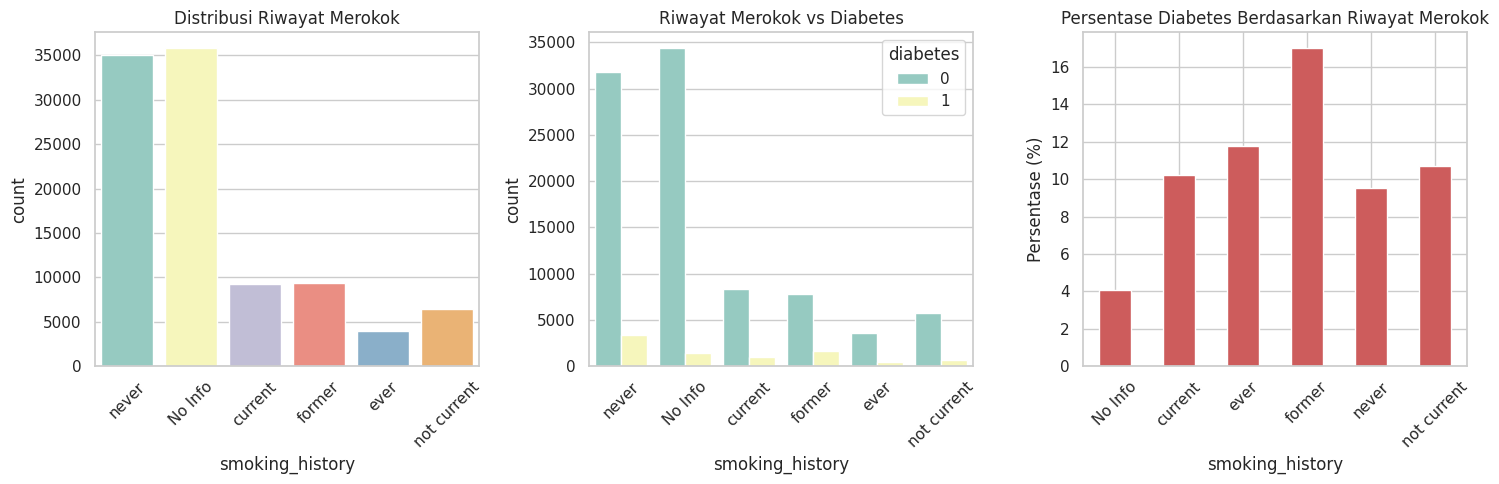

In [10]:

# Smoking History
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.countplot(data=df, x='smoking_history', palette='Set3')
plt.title("Distribusi Riwayat Merokok")
plt.xticks(rotation=45)

plt.subplot(1, 3, 2)
sns.countplot(data=df, x='smoking_history', hue='diabetes', palette='Set3')
plt.title("Riwayat Merokok vs Diabetes")
plt.xticks(rotation=45)

plt.subplot(1, 3, 3)
(df.groupby('smoking_history')['diabetes'].mean() * 100).plot(kind='bar', color='indianred')
plt.title("Persentase Diabetes Berdasarkan Riwayat Merokok")
plt.ylabel("Persentase (%)")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()



Terdapat variasi tingkat diabetes berdasarkan riwayat merokok, dengan beberapa kategori yang menunjukkan risiko lebih tinggi.

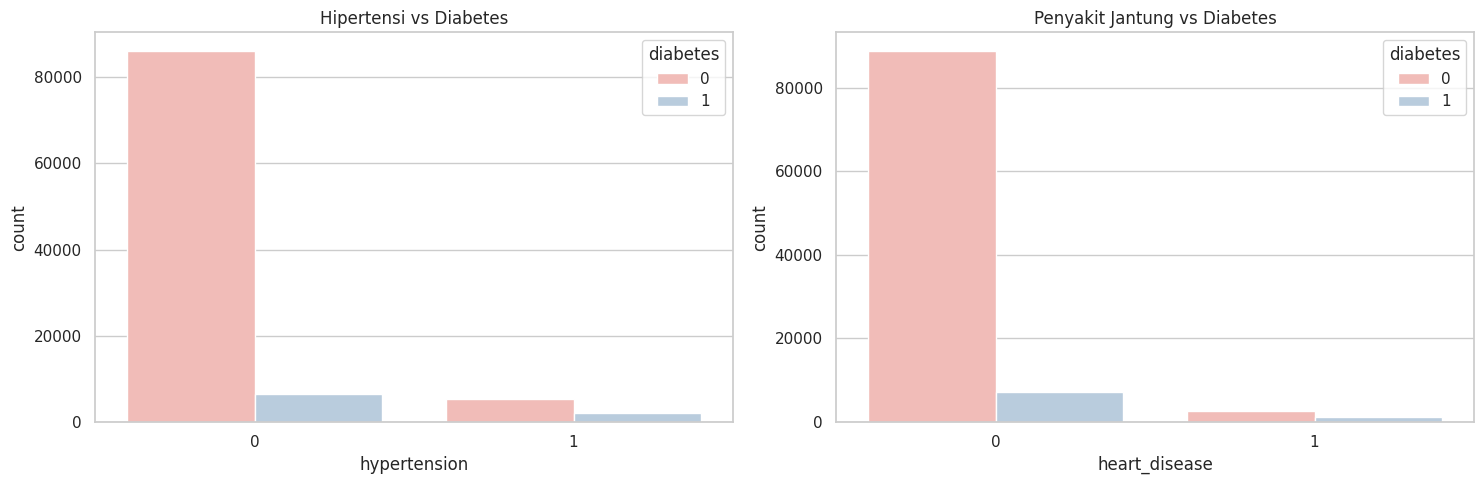

In [11]:
# Hypertension & Heart Disease
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.countplot(data=df, x='hypertension', hue='diabetes', palette='Pastel1')
plt.title("Hipertensi vs Diabetes")

plt.subplot(1, 2, 2)
sns.countplot(data=df, x='heart_disease', hue='diabetes', palette='Pastel1')
plt.title("Penyakit Jantung vs Diabetes")

plt.tight_layout()
plt.show()

## **3. Distribusi Variabel Numerik**

Memvisualisasikan distribusi untuk setiap fitur numerik dalam dataset untuk memahami pola dan outlier potensial:

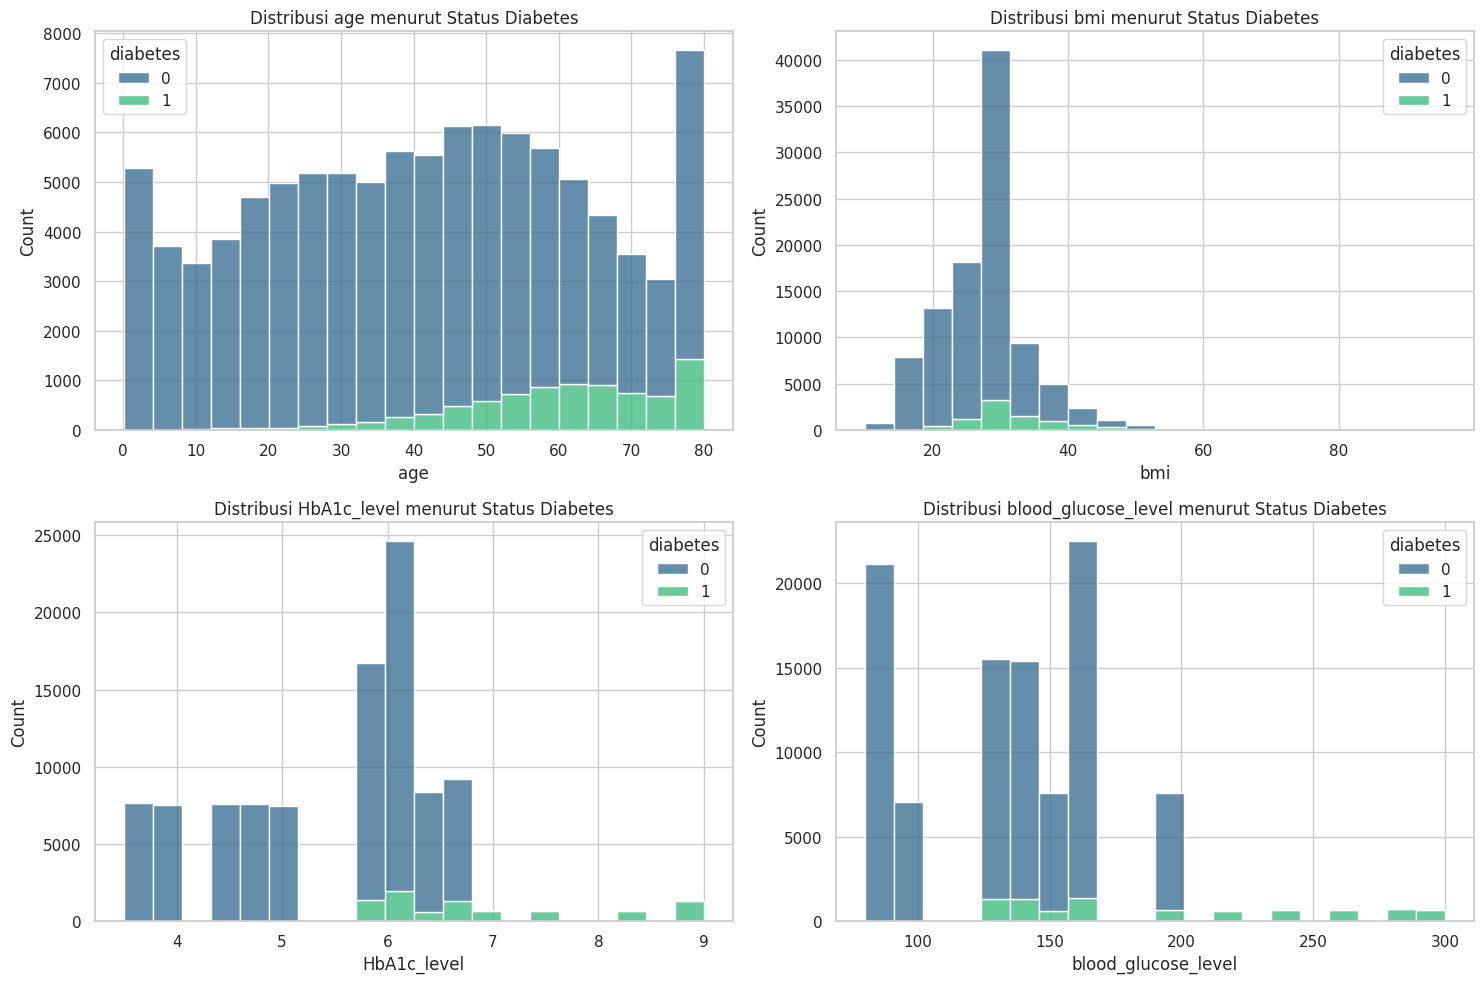

In [12]:
numerical_cols = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']

# Histogram
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 2, i+1)
    sns.histplot(data=df, x=col, hue='diabetes', multiple='stack', bins=20, palette='viridis')
    plt.title(f'Distribusi {col} menurut Status Diabetes')

plt.tight_layout()
plt.show()



## **6. Korelasi Antar Fitur Numerik**

Menghitung dan memvisualisasikan korelasi antar fitur numerik untuk memahami hubungan antar variabel:

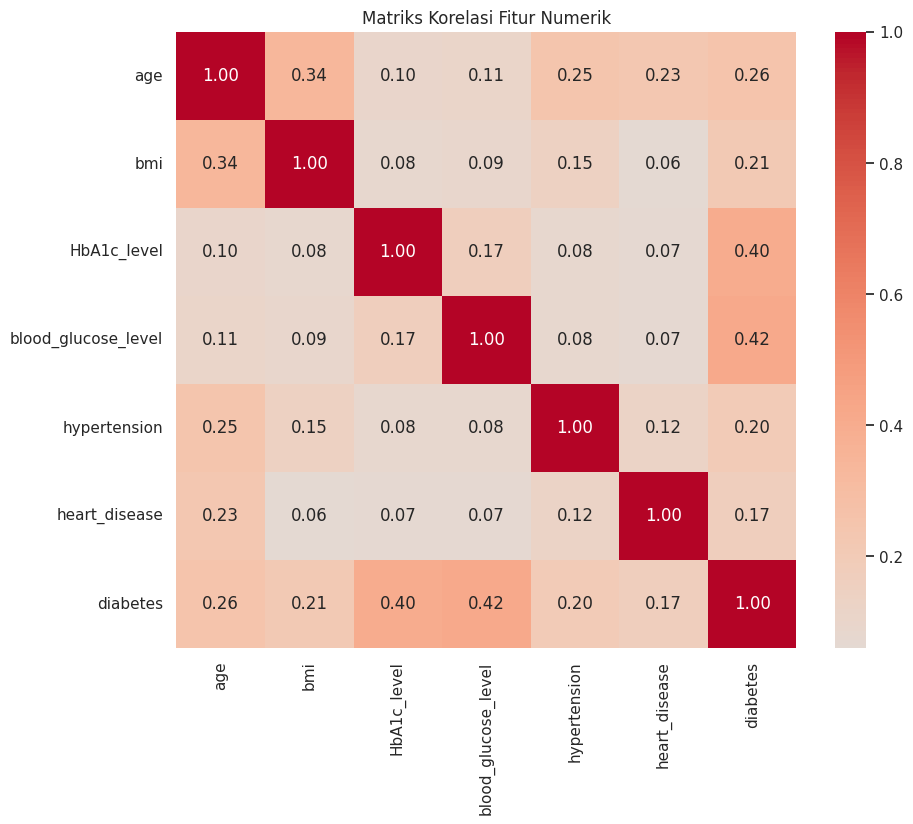

In [13]:
numerical_features = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level', 'hypertension', 'heart_disease', 'diabetes']

# Heatmap korelasi
plt.figure(figsize=(10, 8))
sns.heatmap(df[numerical_features].corr(), annot=True, cmap='coolwarm', center=0, fmt=".2f")
plt.title("Matriks Korelasi Fitur Numerik")
plt.show()



HbA1c_level dan blood_glucose_level menunjukkan korelasi yang tinggi dengan diabetes.

Pasien dengan diabetes memiliki level HbA1c dan kadar glukosa darah yang lebih tinggi dibandingkan non-diabetes.

# **D. Data Preparation**

Tahap data preparation merupakan langkah krusial dalam mempersiapkan data untuk proses modeling. Beberapa tahapan yang akan dilakukan meliputi handling duplicate data, feature encoding, feature selection, data splitting, feature scaling, dan handling class imbalance.

## **1. Handling Duplicate Data**

Sebelum melakukan pemrosesan lebih lanjut, kita perlu memeriksa dan menghapus data yang duplikat agar tidak mempengaruhi hasil modeling.

In [14]:
# Cek jumlah data duplikat sebelum dihapus
print("Jumlah data duplikat sebelum dihapus:", df.duplicated().sum())

# Hapus data duplikat
df = df.drop_duplicates()

# Cek ulang jumlah data duplikat setelah dihapus
print("Jumlah data duplikat setelah dihapus:", df.duplicated().sum())


Jumlah data duplikat sebelum dihapus: 3854
Jumlah data duplikat setelah dihapus: 0


## **2. Feature Encoding**


Mengubah data kategorikal menjadi bentuk numerik agar dapat digunakan oleh algoritma machine learning.

In [15]:
# Create a copy of the dataframe for preprocessing
df_processed = df.copy()

# Label encoding untuk kolom gender
label_encoder = LabelEncoder()
df_processed['gender_encoded'] = label_encoder.fit_transform(df_processed['gender'])
print("Gender encoding mapping:")
for i, category in enumerate(label_encoder.classes_):
    print(f"{category}: {i}")

# One-hot encoding untuk kolom smoking_history
smoking_dummies = pd.get_dummies(df_processed['smoking_history'], prefix='smoking')
df_processed = pd.concat([df_processed, smoking_dummies], axis=1)

# Preview dataframe hasil encoding
print("\nProcessed dataframe preview:")
df_processed.head()


Gender encoding mapping:
Female: 0
Male: 1
Other: 2

Processed dataframe preview:


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_encoded,smoking_No Info,smoking_current,smoking_ever,smoking_former,smoking_never,smoking_not current
0,Female,80.0,0,1,never,25.19,6.6,140,0,0,False,False,False,False,True,False
1,Female,54.0,0,0,No Info,27.32,6.6,80,0,0,True,False,False,False,False,False
2,Male,28.0,0,0,never,27.32,5.7,158,0,1,False,False,False,False,True,False
3,Female,36.0,0,0,current,23.45,5.0,155,0,0,False,True,False,False,False,False
4,Male,76.0,1,1,current,20.14,4.8,155,0,1,False,True,False,False,False,False


## **3. Feature Selection**


Memilih fitur yang relevan untuk dimasukkan ke dalam model.

In [16]:
# Pilih fitur untuk modeling
feature_columns = [
    'gender_encoded', 'age', 'hypertension', 'heart_disease', 'bmi',
    'HbA1c_level', 'blood_glucose_level'
] + list(smoking_dummies.columns)

X = df_processed[feature_columns]
y = df_processed['diabetes']

print("Selected features:")
print(feature_columns)
print(f"\nFeature matrix shape: {X.shape}")
print(f"Target vector shape: {y.shape}")


Selected features:
['gender_encoded', 'age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level', 'blood_glucose_level', 'smoking_No Info', 'smoking_current', 'smoking_ever', 'smoking_former', 'smoking_never', 'smoking_not current']

Feature matrix shape: (96146, 13)
Target vector shape: (96146,)


## **4. Data Splitting**


Membagi dataset menjadi data latih dan data uji dengan proporsi tertentu dan stratifikasi agar distribusi kelas tetap seimbang.

In [17]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")

# Periksa distribusi kelas di data latih dan uji
print("\nClass distribution in training set:")
print(pd.Series(y_train).value_counts(normalize=True) * 100)

print("\nClass distribution in testing set:")
print(pd.Series(y_test).value_counts(normalize=True) * 100)


Training set size: 76916 samples
Testing set size: 19230 samples

Class distribution in training set:
diabetes
0    91.177388
1     8.822612
Name: proportion, dtype: float64

Class distribution in testing set:
diabetes
0    91.180447
1     8.819553
Name: proportion, dtype: float64


## **5. Feature Scaling**


Melakukan standarisasi pada fitur numerik agar memiliki rentang dan distribusi yang seragam.

In [18]:
# Standarisasi fitur numerik
scaler = StandardScaler()
numerical_features = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']

X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_test_scaled[numerical_features] = scaler.transform(X_test[numerical_features])

print("Before scaling (training data):")
print(X_train[numerical_features].describe().round(2))

print("\nAfter scaling (training data):")
print(X_train_scaled[numerical_features].describe().round(2))


Before scaling (training data):
            age       bmi  HbA1c_level  blood_glucose_level
count  76916.00  76916.00     76916.00             76916.00
mean      41.76     27.31         5.53               138.11
std       22.47      6.76         1.07                40.90
min        0.08     10.01         3.50                80.00
25%       24.00     23.39         4.80               100.00
50%       43.00     27.32         5.80               140.00
75%       59.00     29.85         6.20               159.00
max       80.00     95.22         9.00               300.00

After scaling (training data):
            age       bmi  HbA1c_level  blood_glucose_level
count  76916.00  76916.00     76916.00             76916.00
mean       0.00     -0.00         0.00                -0.00
std        1.00      1.00         1.00                 1.00
min       -1.86     -2.56        -1.89                -1.42
25%       -0.79     -0.58        -0.68                -0.93
50%        0.06      0.00         0.

## **6. Handling Class Imbalance dengan SMOTE**


Mengatasi ketidakseimbangan kelas dengan menggunakan SMOTE (Synthetic Minority Over-sampling Technique) agar model tidak bias ke kelas mayoritas.

In [19]:
# Terapkan SMOTE untuk mengatasi class imbalance
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_scaled, y_train)

print("Class distribution before SMOTE:")
print(pd.Series(y_train).value_counts())
print(f"Percentage: {pd.Series(y_train).value_counts(normalize=True) * 100}")

print("\nClass distribution after SMOTE:")
print(pd.Series(y_train_balanced).value_counts())
print(f"Percentage: {pd.Series(y_train_balanced).value_counts(normalize=True) * 100}")


Class distribution before SMOTE:
diabetes
0    70130
1     6786
Name: count, dtype: int64
Percentage: diabetes
0    91.177388
1     8.822612
Name: proportion, dtype: float64

Class distribution after SMOTE:
diabetes
0    70130
1    70130
Name: count, dtype: int64
Percentage: diabetes
0    50.0
1    50.0
Name: proportion, dtype: float64


# **E. Modeling**



## Pada tahap modeling, kita akan mengimplementasikan dan membandingkan tiga algoritma berbeda:
 1. Random Forest Classifier
 2. Gradient Boosting Classifier
 3. Support Vector Machine (SVM)

## Selanjutnya, kita akan melakukan hyperparameter tuning pada model terbaik untuk meningkatkan performa.


## **1. Random Forest Classifier**

In [20]:



# Inisialisasi Random Forest
rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    random_state=42,
    n_jobs=-1
)

print("Training Random Forest model...")
%time rf_model.fit(X_train_balanced, y_train_balanced)

# Prediksi pada test set
rf_predictions = rf_model.predict(X_test_scaled)
rf_probabilities = rf_model.predict_proba(X_test_scaled)[:, 1]

# Menampilkan fitur penting
feature_importance = pd.DataFrame({
    'feature': feature_columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

print("\nTop 10 features by importance:")
print(feature_importance.head(10))

Training Random Forest model...
CPU times: user 11.5 s, sys: 56.5 ms, total: 11.5 s
Wall time: 10.4 s

Top 10 features by importance:
                feature  importance
5           HbA1c_level    0.410901
6   blood_glucose_level    0.308613
1                   age    0.160504
4                   bmi    0.074195
2          hypertension    0.019235
7       smoking_No Info    0.011150
3         heart_disease    0.008661
10       smoking_former    0.003416
0        gender_encoded    0.001447
11        smoking_never    0.000730


## **2. Gradient Boosting Classifier**

In [21]:


gb_model = GradientBoostingClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
    random_state=42
)

print("Training Gradient Boosting model...")
%time gb_model.fit(X_train_balanced, y_train_balanced)

gb_predictions = gb_model.predict(X_test_scaled)
gb_probabilities = gb_model.predict_proba(X_test_scaled)[:, 1]




Training Gradient Boosting model...
CPU times: user 39.4 s, sys: 66.5 ms, total: 39.5 s
Wall time: 42.4 s


## **3. Support Vector Machine (SVM)**



In [22]:
svm_model = SVC(
    kernel='rbf',
    C=1.0,
    gamma='scale',
    probability=True,
    random_state=42
)

print("Training SVM model...")
%time svm_model.fit(X_train_balanced, y_train_balanced)

svm_predictions = svm_model.predict(X_test_scaled)
svm_probabilities = svm_model.predict_proba(X_test_scaled)[:, 1]

Training SVM model...
CPU times: user 21min 57s, sys: 2.11 s, total: 21min 59s
Wall time: 22min 3s


## **4. Model Evaluation Function**

Pada tahap ini, kita melakukan evaluasi terhadap model yang telah dilatih sebelumnya dengan menggunakan berbagai metrik evaluasi untuk mengukur kinerja secara menyeluruh.

In [23]:


def evaluate_model(y_true, y_pred, y_prob, model_name):
    """Evaluate model performance with multiple metrics"""
    metrics = {
        'Model': model_name,
        'Accuracy': accuracy_score(y_true, y_pred),
        'Precision': precision_score(y_true, y_pred),
        'Recall': recall_score(y_true, y_pred),
        'F1-Score': f1_score(y_true, y_pred),
        'ROC-AUC': roc_auc_score(y_true, y_prob)
    }
    return metrics


# Contoh pemanggilan fungsi evaluasi untuk model Random Forest:
rf_metrics = evaluate_model(y_test, rf_predictions, rf_probabilities, "Random Forest")
gb_metrics = evaluate_model(y_test, gb_predictions, gb_probabilities, "Gradient Boosting")
svm_metrics = evaluate_model(y_test, svm_predictions, svm_probabilities, "SVM")


In [24]:
# Gabungkan hasil ke dalam DataFrame untuk perbandingan mudah
import pandas as pd

results = pd.DataFrame([rf_metrics, gb_metrics, svm_metrics])
print(results)

               Model  Accuracy  Precision    Recall  F1-Score   ROC-AUC
0      Random Forest  0.910920   0.497152  0.875000  0.634053  0.972005
1  Gradient Boosting  0.969007   0.909836  0.719929  0.803818  0.975586
2                SVM  0.879043   0.415640  0.915094  0.571639  0.966682


ROC Curve digunakan untuk memvisualisasikan trade-off antara True Positive Rate (TPR) dan False Positive Rate (FPR) untuk masing-masing model. Semakin dekat kurva ke pojok kiri atas grafik, semakin baik performa model.

ROC Curve ditampilkan untuk:

Random Forest (AUC = 0.972)

Gradient Boosting (AUC = 0.976)

SVM (AUC = 0.967)

Kurva ROC ini sangat penting dalam konteks binary classification untuk memahami seberapa baik model dapat memisahkan kelas positif dan negatif.



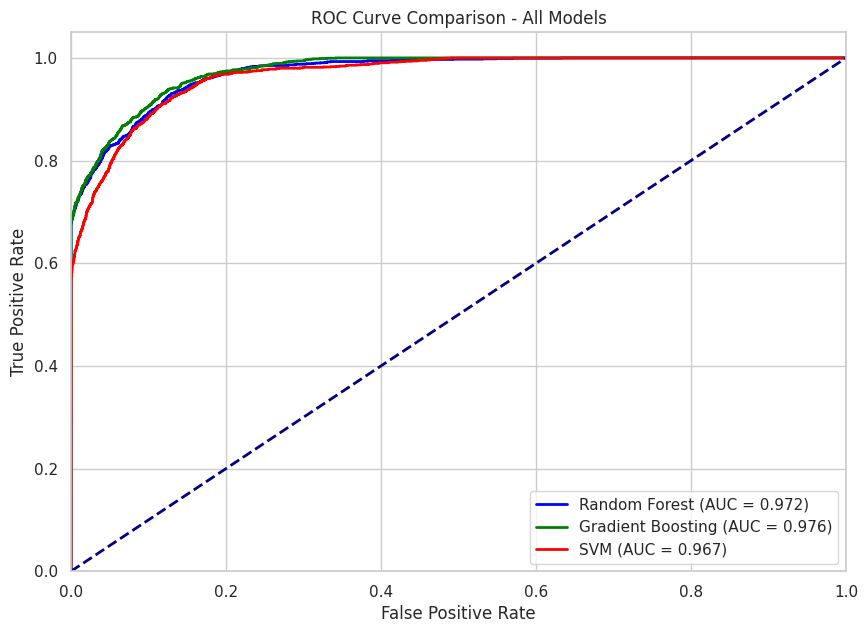

In [25]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Calculate ROC curves and AUC for all three models
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probabilities)
rf_auc = roc_auc_score(y_test, rf_probabilities)

gb_fpr, gb_tpr, _ = roc_curve(y_test, gb_probabilities)
gb_auc = roc_auc_score(y_test, gb_probabilities)

svm_fpr, svm_tpr, _ = roc_curve(y_test, svm_probabilities)
svm_auc = roc_auc_score(y_test, svm_probabilities)

# Plot all ROC curves
plt.figure(figsize=(10, 7))

plt.plot(rf_fpr, rf_tpr, color='blue', lw=2, label=f'Random Forest (AUC = {rf_auc:.3f})')
plt.plot(gb_fpr, gb_tpr, color='green', lw=2, label=f'Gradient Boosting (AUC = {gb_auc:.3f})')
plt.plot(svm_fpr, svm_tpr, color='red', lw=2, label=f'SVM (AUC = {svm_auc:.3f})')

# Diagonal line for reference
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

# Plot settings
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison - All Models')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


Model dengan performa terbaik, dalam hal ini Gradient Boosting, dievaluasi ulang dengan k-fold cross-validation sebanyak 5 fold untuk mengukur stabilitas performa model pada data yang berbeda-beda.

Hasil cross-validation menunjukkan nilai rata-rata dan standar deviasi dari:

Accuracy

Precision

Recall

F1-Score

ROC-AUC

In [26]:
from sklearn.model_selection import cross_validate

#kita menggunakan best gb_model
best_gb_model = gb_model

# Perform cross-validation on the best model
cv_scores = cross_validate(
    best_gb_model,
    X_train_balanced,
    y_train_balanced,
    cv=5,
    scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'],
    return_train_score=True
)

# Display cross-validation results
cv_results = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC'],
    'CV Mean': [
        cv_scores['test_accuracy'].mean(),
        cv_scores['test_precision'].mean(),
        cv_scores['test_recall'].mean(),
        cv_scores['test_f1'].mean(),
        cv_scores['test_roc_auc'].mean()
    ],
    'CV Std': [
        cv_scores['test_accuracy'].std(),
        cv_scores['test_precision'].std(),
        cv_scores['test_recall'].std(),
        cv_scores['test_f1'].std(),
        cv_scores['test_roc_auc'].std()
    ]
})

print("Cross-Validation Results:")
print(cv_results)

Cross-Validation Results:
      Metric   CV Mean    CV Std
0   Accuracy  0.972722  0.028858
1  Precision  0.991743  0.003951
2     Recall  0.953643  0.061635
3   F1-Score  0.971123  0.031986
4    ROC-AUC  0.996883  0.004261


Terakhir, semua hasil evaluasi dari model ditampilkan dalam bentuk grafik batang untuk membandingkan performa antar model secara visual berdasarkan metrik evaluasi yang telah disebutkan.

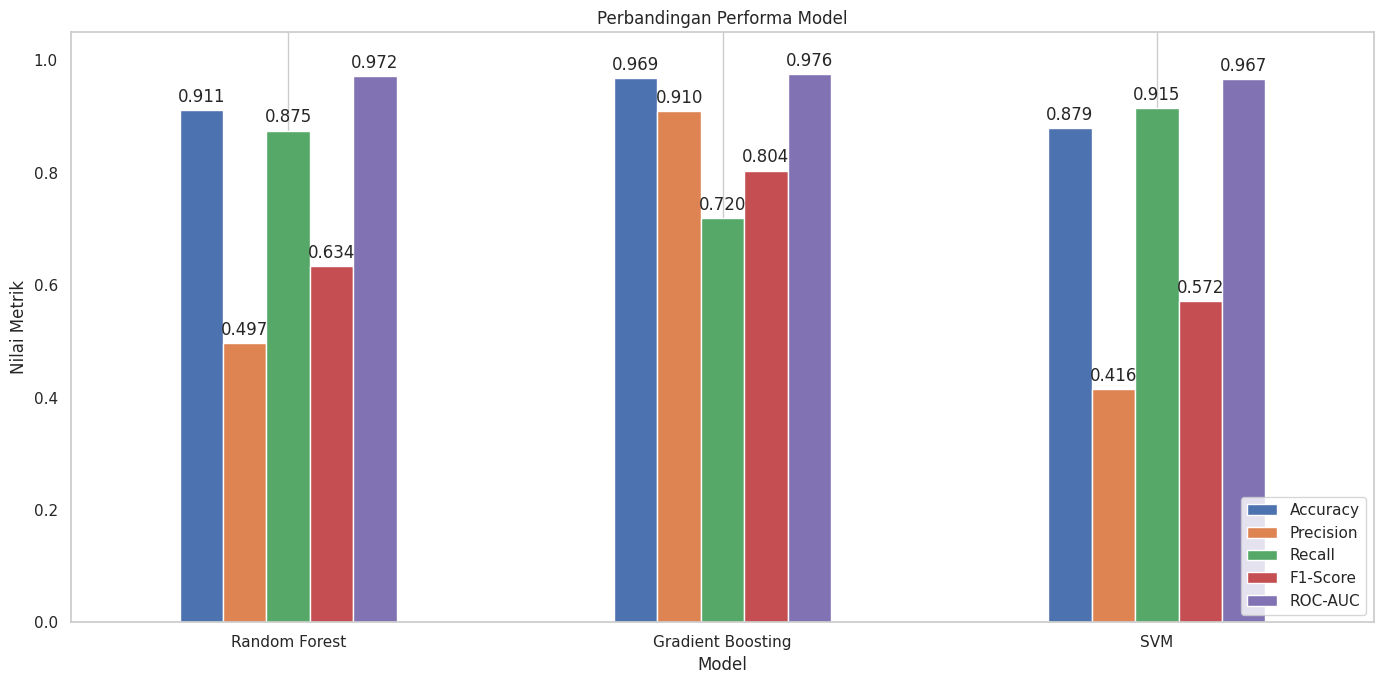

In [31]:
import matplotlib.pyplot as plt
# Plot performance comparison
# Use the 'results_plot' DataFrame
ax = results_plot.plot(kind='bar', figsize=(14, 7))
plt.title('Perbandingan Performa Model')
plt.ylabel('Nilai Metrik')
plt.ylim(0, 1.05) # Increase y-limit slightly for annotations
plt.grid(axis='y')
plt.xticks(rotation=0)
plt.legend(loc='lower right')

# Add percentage labels to each bar
for container in ax.containers:
    labels = [f'{v.get_height():.3f}' for v in container] # Format as percentage
    ax.bar_label(container, labels=labels, label_type='edge', padding=3)


plt.tight_layout()
plt.show()


Gradient Boosting memiliki akurasi tertinggi (96.9%), precision tinggi (91%), dan ROC-AUC tertinggi (97.6%), menjadikannya model terbaik secara keseluruhan.

Random Forest memiliki recall yang tinggi (87.5%) dan ROC-AUC juga tinggi, tetapi precision dan F1-nya lebih rendah.

SVM memiliki recall tertinggi (91.5%) namun precision dan F1-score-nya terlalu rendah untuk dianggap seimbang.